In [ ]:
%matplotlib inline

# Módulo 4 - Aula 2: Grid Search

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Jesus Paucar -- j236865@dac.unicamp.br

Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina:
[moodle.lab.ic.unicamp.br/680](https://moodle.ic.unicamp.br/moodle/course/view.php?id=680)

Instituto de Computação - Unicamp 2025


**Busca de parametros com ``GridSearchCV`` e ``RandomSearchCV``**

*Fonte: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Parameter tuning com `cross_val_score`

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Carrega o dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# 10-fold cross-validation com C=1.0
svm = SVC(kernel='rbf', C=0.1)
scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy', verbose=1)
print(scores)

[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.8
 1.         0.93333333 1.         0.93333333]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [ ]:
# acurácia média desvio padrão dos 10-folds
print(scores.mean())
print(scores.std())

0.9333333333333333
0.05163977794943221


In [ ]:
# busca o melhor valor de C
C_range = np.logspace(-2, 10, 8)
C_scores = []
for C in C_range:
    svm = SVC(kernel='rbf', C=C)
    scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy',verbose=1)
    C_scores.append(float(scores.mean()))
print('-' * 100)
print(C_range)
print('-' * 100)
print(C_scores)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


----------------------------------------------------------------------------------------------------
[1.00000000e-02 5.17947468e-01 2.68269580e+01 1.38949549e+03
 7.19685673e+04 3.72759372e+06 1.93069773e+08 1.00000000e+10]
----------------------------------------------------------------------------------------------------
[0.9266666666666667, 0.9533333333333334, 0.9733333333333334, 0.96, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


## Parameter tuning com `GridSearchCV` (mais eficiente)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define os valores do parametro
C_range = np.logspace(-2, 10, 8)
gamma_range = np.logspace(-2, 10, 8)
print(C_range)

[1.00000000e-02 5.17947468e-01 2.68269580e+01 1.38949549e+03
 7.19685673e+04 3.72759372e+06 1.93069773e+08 1.00000000e+10]


In [ ]:
# cria o grid do parametro
param_grid = dict(C=C_range, gamma=gamma_range)
print(param_grid)

{'C': array([1.00000000e-02, 5.17947468e-01, 2.68269580e+01, 1.38949549e+03,
       7.19685673e+04, 3.72759372e+06, 1.93069773e+08, 1.00000000e+10]), 'gamma': array([1.00000000e-02, 5.17947468e-01, 2.68269580e+01, 1.38949549e+03,
       7.19685673e+04, 3.72759372e+06, 1.93069773e+08, 1.00000000e+10])}


In [ ]:
# instantiate the grid
grid = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy',verbose=1)

- Você pode usar **`n_jobs = -1`** para executar em paralelo (se suportado pelo computador/SO)

In [ ]:
grid.fit(X, y)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(C=np.float64(10000000000.0)),
             param_grid={'C': array([1.00000000e-02, 5.17947468e-01, 2.68269580e+01, 1.38949549e+03,
       7.19685673e+04, 3.72759372e+06, 1.93069773e+08, 1.00000000e+10]),
                         'gamma': array([1.00000000e-02, 5.17947468e-01, 2.68269580e+01, 1.38949549e+03,
       7.19685673e+04, 3.72759372e+06, 1.93069773e+08, 1.00000000e+10])},
             scoring='accuracy', verbose=1)

In [ ]:
grid.cv_results_['mean_test_score']

array([0.90666667, 0.95333333, 0.65333333, 0.4       , 0.38666667,
       0.33333333, 0.33333333, 0.33333333, 0.91333333, 0.98      ,
       0.72      , 0.4       , 0.38666667, 0.33333333, 0.33333333,
       0.33333333, 0.98      , 0.95333333, 0.84666667, 0.4       ,
       0.38666667, 0.33333333, 0.33333333, 0.33333333, 0.97333333,
       0.91333333, 0.84666667, 0.4       , 0.38666667, 0.33333333,
       0.33333333, 0.33333333, 0.96      , 0.91333333, 0.84666667,
       0.4       , 0.38666667, 0.33333333, 0.33333333, 0.33333333,
       0.93333333, 0.91333333, 0.84666667, 0.4       , 0.38666667,
       0.33333333, 0.33333333, 0.33333333, 0.93333333, 0.91333333,
       0.84666667, 0.4       , 0.38666667, 0.33333333, 0.33333333,
       0.33333333, 0.93333333, 0.91333333, 0.84666667, 0.4       ,
       0.38666667, 0.33333333, 0.33333333, 0.33333333])

In [ ]:
grid.cv_results_['params']

[{'C': np.float64(0.01), 'gamma': np.float64(0.01)},
 {'C': np.float64(0.01), 'gamma': np.float64(0.517947467923121)},
 {'C': np.float64(0.01), 'gamma': np.float64(26.826957952797247)},
 {'C': np.float64(0.01), 'gamma': np.float64(1389.4954943731361)},
 {'C': np.float64(0.01), 'gamma': np.float64(71968.56730011514)},
 {'C': np.float64(0.01), 'gamma': np.float64(3727593.720314938)},
 {'C': np.float64(0.01), 'gamma': np.float64(193069772.88832456)},
 {'C': np.float64(0.01), 'gamma': np.float64(10000000000.0)},
 {'C': np.float64(0.517947467923121), 'gamma': np.float64(0.01)},
 {'C': np.float64(0.517947467923121), 'gamma': np.float64(0.517947467923121)},
 {'C': np.float64(0.517947467923121), 'gamma': np.float64(26.826957952797247)},
 {'C': np.float64(0.517947467923121), 'gamma': np.float64(1389.4954943731361)},
 {'C': np.float64(0.517947467923121), 'gamma': np.float64(71968.56730011514)},
 {'C': np.float64(0.517947467923121), 'gamma': np.float64(3727593.720314938)},
 {'C': np.float64(0.517

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00239553, 0.00217071, 0.00243146, 0.00228095, 0.00225942,
        0.0020772 , 0.00249324, 0.00241497, 0.00163343, 0.00146542,
        0.0024718 , 0.00221515, 0.00206842, 0.00222964, 0.00218611,
        0.0024143 , 0.00127211, 0.00132177, 0.00251584, 0.00254648,
        0.00227735, 0.00221319, 0.00242031, 0.00267506, 0.00126426,
        0.00164371, 0.00364654, 0.00259242, 0.00232973, 0.00217006,
        0.00221102, 0.00230114, 0.00185323, 0.00177073, 0.0024543 ,
        0.00285828, 0.00249567, 0.00221369, 0.00221841, 0.00224636,
        0.01215372, 0.00156705, 0.0026017 , 0.00251431, 0.00235391,
        0.00249431, 0.00257101, 0.00224621, 0.01364191, 0.0016083 ,
        0.00244842, 0.00255589, 0.00234334, 0.00228286, 0.00243425,
        0.00230961, 0.0119617 , 0.0016176 , 0.00253994, 0.00246274,
        0.00224783, 0.00237994, 0.00240011, 0.0024255 ]),
 'std_fit_time': array([6.27654089e-04, 1.40548883e-04, 2.87311602e-04, 1.22377867e-04,
        2.96770688e-0

In [ ]:
# O melhor modelo é

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'C': np.float64(0.517947467923121), 'gamma': np.float64(0.517947467923121)}
SVC(C=np.float64(0.517947467923121), gamma=np.float64(0.517947467923121))


## Usando os melhores parametros no teste (``predict()``)

In [ ]:
# train your model using all data and the best known parameters
svm = SVC(kernel = 'linear', C=0.517947467923121) # or directly grid.best_estimator_
svm.fit(X, y)

# make a prediction on out-of-sample data
svm.predict([[6.1, 2.4, 1.2, 0.1]])

array([0])

In [ ]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[6.1, 2.4, 1.2, 0.1]])

array([0])

## Uma alternativa mais barata: `RandomizedSearchCV`

- `RandomizedSearchCV` busca em um subconjunto dos parametros e você controla o n. de iterações

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# especifica "parameter distributions" ao invés de "parameter grid"

C_range = np.logspace(-2, 10, 8)
gamma_range = np.logspace(-9, 3, 8)
param_dist = dict(gamma=gamma_range, C=C_range)

In [ ]:
# n_iter controla o número de buscas
svm = SVC(kernel = 'rbf')
rand = RandomizedSearchCV(svm, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
rand.cv_results_['mean_test_score']

array([0.91333333, 0.93333333, 0.4       , 0.91333333, 0.4       ,
       0.9       , 0.90666667, 0.90666667, 0.96666667, 0.4       ])

In [ ]:
# melhor modelo
print(rand.best_score_)
print(rand.best_params_)

0.9666666666666668
{'gamma': np.float64(0.007196856730011514), 'C': np.float64(1389.4954943731361)}


In [ ]:
# executa RandomizedSearchCV 10 vezes
best_scores = []
best_params = []
for _ in range(10):
    rand = RandomizedSearchCV(svm, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_params.append(rand.best_params_)
    best_scores.append(round(rand.best_score_, 3))

print(best_scores,"\n")
print(best_params)

[np.float64(0.993), np.float64(0.98), np.float64(0.953), np.float64(0.98), np.float64(0.993), np.float64(0.993), np.float64(0.96), np.float64(0.993), np.float64(0.993), np.float64(0.967)] 

[{'gamma': np.float64(0.007196856730011514), 'C': np.float64(26.826957952797247)}, {'gamma': np.float64(5.1794746792312124e-08), 'C': np.float64(10000000000.0)}, {'gamma': np.float64(0.3727593720314938), 'C': np.float64(26.826957952797247)}, {'gamma': np.float64(0.3727593720314938), 'C': np.float64(0.517947467923121)}, {'gamma': np.float64(0.0001389495494373136), 'C': np.float64(1389.4954943731361)}, {'gamma': np.float64(0.0001389495494373136), 'C': np.float64(1389.4954943731361)}, {'gamma': np.float64(2.6826957952797274e-06), 'C': np.float64(10000000000.0)}, {'gamma': np.float64(0.007196856730011514), 'C': np.float64(26.826957952797247)}, {'gamma': np.float64(0.007196856730011514), 'C': np.float64(26.826957952797247)}, {'gamma': np.float64(0.007196856730011514), 'C': np.float64(71968.56730011514)}]

In [ ]:
# comparando com GridSearchCV
grid = GridSearchCV(svm, param_dist, cv=10, scoring='accuracy')
grid.fit(X, y)
meanTestScore = grid.cv_results_['mean_test_score']
print(meanTestScore)
print(len(meanTestScore)) #len(C_range) * len(gamma_range)

[0.89333333 0.90666667 0.90666667 0.90666667 0.90666667 0.94
 0.67333333 0.4        0.89333333 0.90666667 0.90666667 0.90666667
 0.92666667 0.98       0.81333333 0.4        0.89333333 0.90666667
 0.90666667 0.93333333 0.99333333 0.95333333 0.9        0.4
 0.89333333 0.90666667 0.93333333 0.99333333 0.96666667 0.91333333
 0.9        0.4        0.89333333 0.93333333 0.98666667 0.96666667
 0.96666667 0.91333333 0.9        0.4        0.90666667 0.97333333
 0.96666667 0.98       0.93333333 0.91333333 0.9        0.4
 0.90666667 0.98       0.96666667 0.96       0.93333333 0.91333333
 0.9        0.4        0.90666667 0.98       0.96       0.94666667
 0.93333333 0.91333333 0.9        0.4       ]
64


In [ ]:
print(grid.cv_results_['mean_test_score'].mean())
print(rand.cv_results_['mean_test_score'].mean())

0.8577083333333333
0.866


## Extra: Curvas de Validação

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-1379612746.py:2: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$\gamma$")


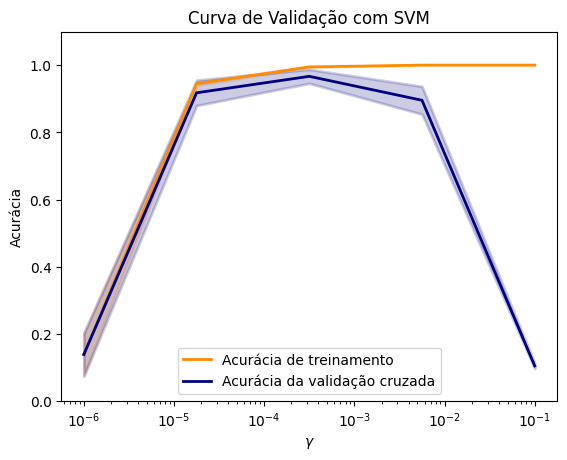

In [ ]:
plt.title("Curva de Validação com SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Acurácia")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Acurácia de treinamento",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Acurácia da validação cruzada",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### Observações

- O plot mostra diferentes valores para o parâmetro gamma.
- Esquerda: valores baixo para ambos --> underfitting
- Direita: valor baixo apenas para validação, mas alto no treino --> overfitting
- Centro: Melhores valores para gamma